Machine Learning Internship at IIT ISM (Dhanbad):

Assignment-I (Exploratory Data Analysis)

Completed by,

      Ram Prasanna      
      Gayathri Lakshmi
      Kajal Tiwari
      Sandeep
      Vamsi
      Sasi
      Tharun 
      Asim Arbind Samal
      Nandan
      Gourav Garg
      Kalyani
      


## Importing Libraries and Load Data

In [1]:
!pip install joypy -q

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib import cm
import joypy
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,6)

from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
udemy = pd.read_csv("C:\\Users\\Ram Prasanna\\Desktop\\udemy_courses.csv")

## Look Over Data:

In [3]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [5]:
udemy.shape

(3678, 12)

In [6]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
udemy.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

## Checking for Null Values:

In [8]:
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

As we have seen that the given dataset consist of no null values

## Checking for Duplicate Values:

In [9]:
original_count = udemy.shape[0]
print(f'Dataset Consists of {original_count} rows')
udemy.drop_duplicates(inplace=True)
print("Removing Duplicate Rows...")
updated_row_count = udemy.shape[0]
print(f'Now after Removing Duplicate Rows,Dataset Consists of {updated_row_count} rows')

Dataset Consists of 3678 rows
Removing Duplicate Rows...
Now after Removing Duplicate Rows,Dataset Consists of 3672 rows


## Analysing :

In [10]:
subject_courses = udemy.groupby('subject').course_id.count()
subject_courses

subject
Business Finance       1191
Graphic Design          602
Musical Instruments     680
Web Development        1199
Name: course_id, dtype: int64

In [11]:
level_courses = udemy.groupby('level').course_id.count()
level_courses

level
All Levels            1925
Beginner Level        1268
Expert Level            58
Intermediate Level     421
Name: course_id, dtype: int64

In [12]:
import datetime as dt
udemy['Year'] = pd.DatetimeIndex(udemy['published_timestamp']).year  
year_courses = udemy.groupby('Year').course_id.count()
year_courses

Year
2011       5
2012      45
2013     201
2014     490
2015    1014
2016    1204
2017     713
Name: course_id, dtype: int64

In [13]:
year_subscribers = udemy.groupby('Year').num_subscribers.sum()
year_subscribers


Year
2011     119028
2012     555339
2013    1680153
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64

In [14]:
udemy['revenue'] = udemy['num_subscribers'] * udemy['price']
year_revenue = udemy.groupby('Year').revenue.sum()
year_revenue

Year
2011     11643420
2012     11773470
2013     69405820
2014    106939045
2015    314510395
2016    276633190
2017     90769600
Name: revenue, dtype: int64

In [15]:
level_subscribers = udemy.groupby('level').num_subscribers.sum()
level_subscribers

level
All Levels            6871791
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

Breakdown of Free Courses and Paid Courses:

In [16]:
print('There are {} paid courses and {} free courses.'.format(udemy[udemy.is_paid == True].shape[0], udemy[udemy.is_paid == False].shape[0]))

There are 3362 paid courses and 310 free courses.


List of Courses with Zero Subscribers:

In [17]:
udemy[udemy['num_subscribers'] == 0]['course_title']

453     Essentials of money value: Get a financial Life !
454     Introduction to Forex Trading Business For Beg...
455     Cryptocurrency (BTC & ETH) Investment & Tradin...
456     Introduction to Project Management for Finance...
457                 Best Practices in Corporate Budgeting
                              ...                        
2402                    Tune that Sour Note on Your Piano
2403        Learn Vikings Soundtracks on the Piano by Ear
2404    Learn to Play Piano Like a Pro - Easy Piano Co...
2405    ABRSM Grade III Piano Class - Handel Sonatina ...
2418                    Learn to Play Sweet Child of Mine
Name: course_title, Length: 65, dtype: object

The Top 5 Courses with Maximum Number of Subscribers:

In [18]:
udemy.nlargest(5,['num_subscribers'])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,revenue
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,2013,0
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development,2013,0
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,2015,24316800
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,2014,0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,2016,22902400


The Top 5 Courses with Maximum Number of Lectures 

In [19]:
udemy.nlargest(5,['num_lectures'])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,revenue
2707,79154,Back to School Web Development and Programming...,https://www.udemy.com/back-to-school-web-devel...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19T14:53:00Z,Web Development,2013,3634000
160,543242,Learn to Trade The News,https://www.udemy.com/learn-to-trade-the-news/,True,200,1924,351,544,All Levels,46.5,2015-07-16T22:03:29Z,Business Finance,2015,384800
2748,978728,"Thoughtful Web Development Course: HTML, Vue.j...",https://www.udemy.com/web-development-html5-cs...,True,200,842,144,536,All Levels,25.0,2016-10-11T14:18:27Z,Web Development,2016,168400
561,375594,Financial Management - A Complete Study,https://www.udemy.com/financial-management-a-c...,True,190,1941,128,527,All Levels,71.5,2014-12-22T16:57:30Z,Business Finance,2014,368790
3004,481696,Code & Grow Rich: Earn More As An Entrepreneu...,https://www.udemy.com/code-grow-rich-earn-more...,True,200,7211,52,491,All Levels,57.0,2016-02-10T01:09:19Z,Web Development,2016,1442200


The Top 5 Courses that generated More Revenue:

In [20]:
udemy.nlargest(5,['revenue'])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,revenue
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,2015,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,2016,22902400
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07T06:27:51Z,Musical Instruments,2014,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11T07:29:29Z,Web Development,2016,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development,2015,13932100


## Visualization:

The following plot clearly shows that courses uploaded for all levels are large in number compared to others
Conversely Courses that are uploaded for expert level are very few in number

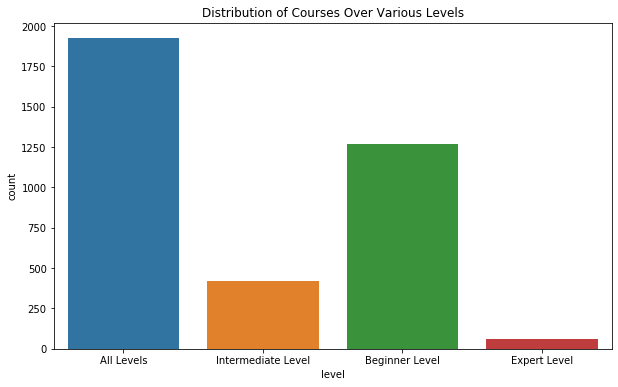

In [21]:
#Distribution of Courses over various levels
plt.figure(figsize=(10,6))
plt.title("Distribution of Courses Over Various Levels")
plt.xlabel("Level")
sns.countplot(x = 'level', data= udemy)


The Following plot shows that the courses consists of many lectures are mostly paid and kind of Introductry Courses with some lectures are free

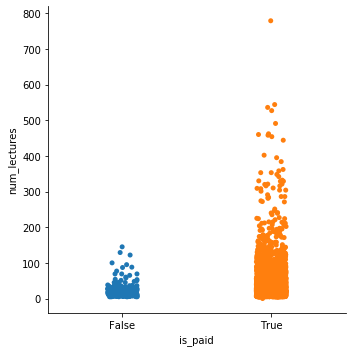

In [22]:
sns.catplot(x="is_paid", y="num_lectures", data=udemy)

Many of the udemy courses are paid. Only few free courses are available

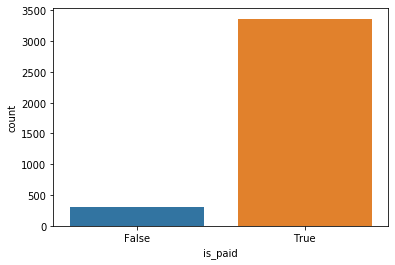

In [23]:
sns.countplot(x="is_paid",data=udemy)

In the following plotting, We can see that number of courses on Business Finance are closely equal to that of Web development

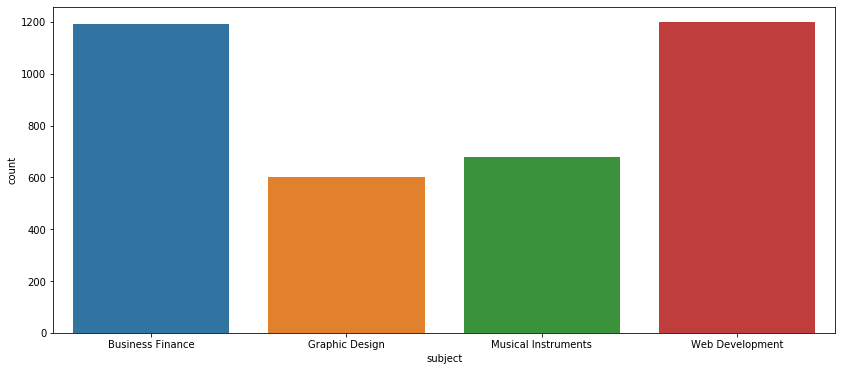

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x = "subject",data=udemy)

There will be less no of courses with Maximum Price in Musical Instruments

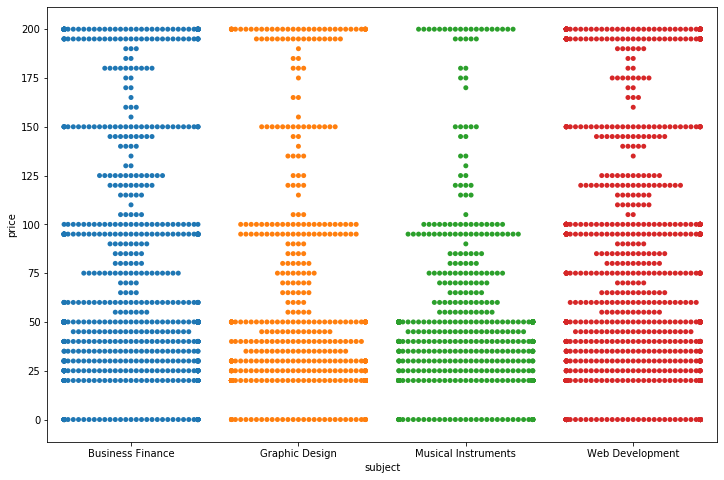

In [25]:
plt.figure(figsize=(12,8))
sns.swarmplot(x=udemy['subject'],y=udemy['price'])

There are more number of lectures for Web Development Courses than Other Courses

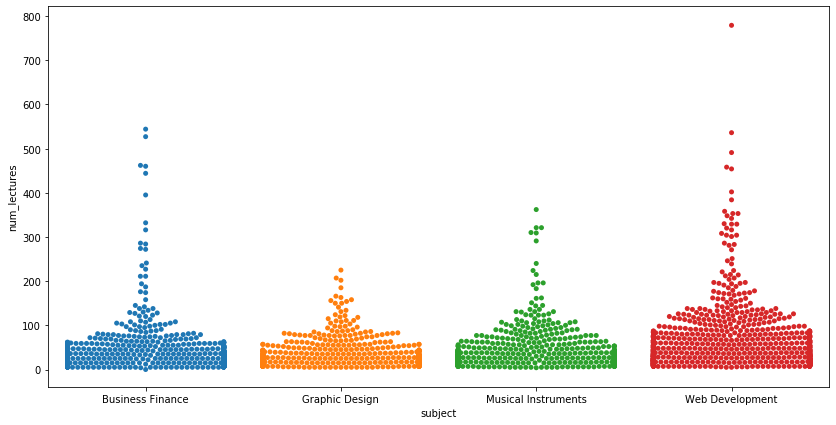

In [26]:
plt.figure(figsize=(14,7))
sns.swarmplot(x=udemy['subject'],y=udemy['num_lectures'])

The Following Visual will give you how subscribers are varied over subjects

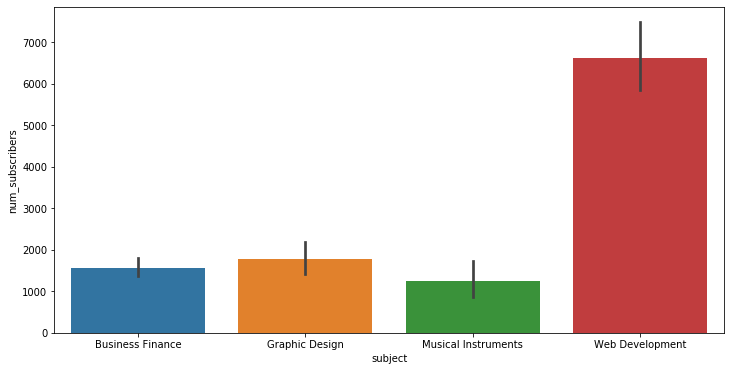

In [27]:
fig =plt.figure(figsize=(12,6))
sns.barplot(x=udemy['subject'],y=udemy['num_subscribers'])

The Following Visuals will give you complete understanding of how subscribers are distributed over subjects and over levels

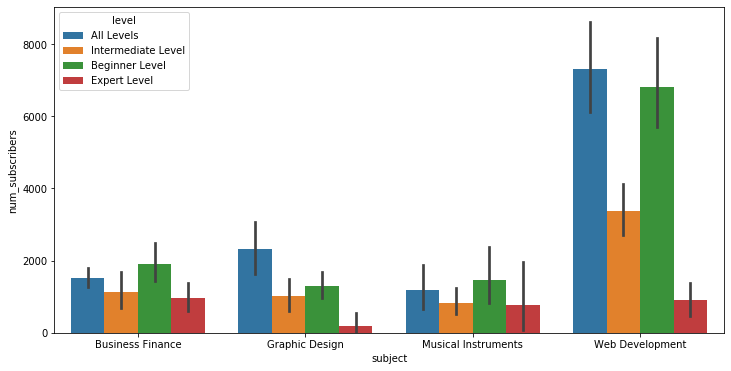

In [28]:
fig =plt.figure(figsize=(12,6))
sns.barplot(udemy['subject'],udemy['num_subscribers'],udemy['level'])
plt.show()

In [29]:
subject_names = [x for x in udemy.subject.unique()]
total_courses = [x for x in udemy.subject.value_counts().values]
paid_courses = [x for x in udemy[udemy.is_paid == True].subject.value_counts().values]
free_courses = [x for x in udemy[udemy.is_paid == False].subject.value_counts().values]
count_values = np.array([total_courses, paid_courses, free_courses])
count_values

array([[1199, 1191,  680,  602],
       [1095, 1066,  634,  567],
       [ 133,   96,   46,   35]], dtype=int64)

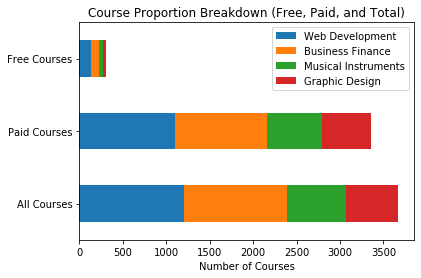

<Figure size 1008x432 with 0 Axes>

In [30]:
ans = pd.DataFrame(count_values, columns = udemy.subject.value_counts().index.to_list())
ans['course_breakdown'] = ['All Courses', 'Paid Courses', 'Free Courses']
ans.set_index('course_breakdown', inplace=True)
ax = ans.plot(kind='barh', stacked=True,title='Course Proportion Breakdown (Free, Paid, and Total)')
ax.set_xlabel('Number of Courses')
ax.set_ylabel('')
plt.figure(figsize=(14,6))
plt.show()

Distribution of Course Prices

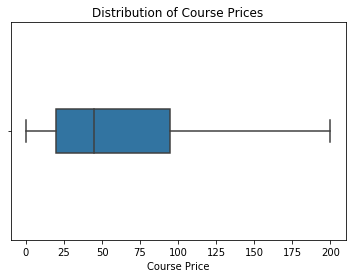

In [31]:
ax = sns.boxplot(y=udemy.price, orient='h', width=0.2)
ax.set(xlabel='Course Price', title='Distribution of Course Prices')
plt.show()

With the Help of above plot we came to know that most courses are paid in the range of 20 and 100

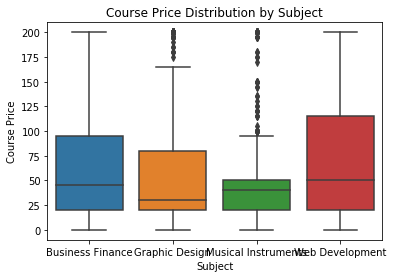

In [32]:
ax = sns.boxplot(x=udemy.subject, y=udemy.price)
ax.set(title='Course Price Distribution by Subject', xlabel='Subject', ylabel='Course Price')
plt.show()

With the above visuals we came to know that Musical Instrument Courses costs less than other three subjects

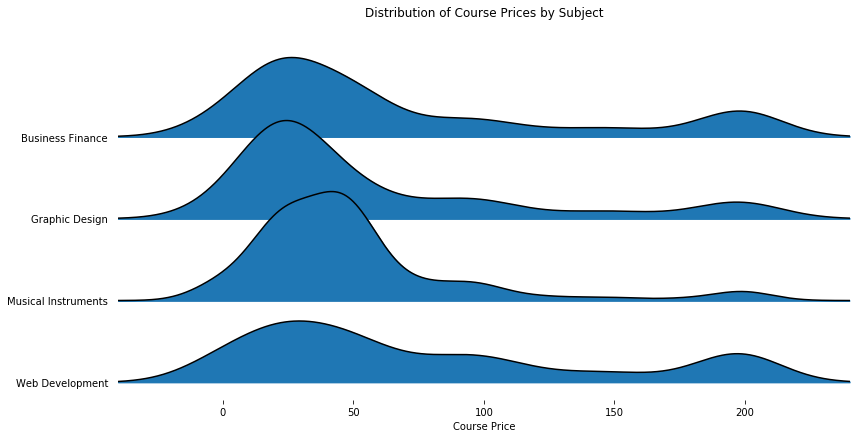

In [33]:
fig, ax = joypy.joyplot(udemy, by='subject', column='price', figsize=(12, 6), title='Distribution of Course Prices by Subject')
plt.xlabel('Course Price')
plt.show()

The Above Visuals tell you how course price have distributed over various prices

Top 5 Courses on Each Subject Based on Number of Subscribers

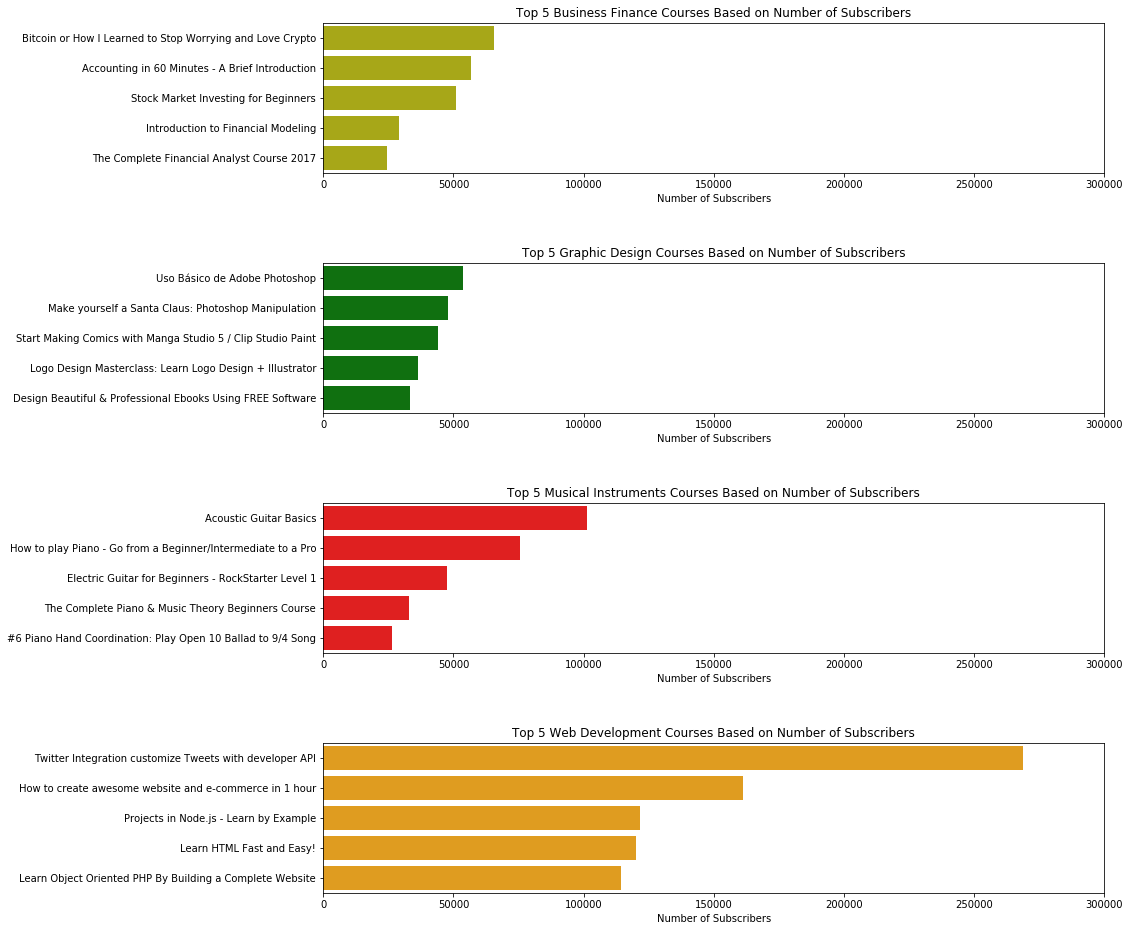

In [34]:
top_5_by_sub = udemy.num_subscribers.groupby(udemy.subject).nlargest(5).reset_index(drop=False)
top_5_by_sub['course_title'] = top_5_by_sub.level_1.apply(lambda x: udemy.iloc[x].course_title)
top_5_by_sub.drop('level_1', axis=1, inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(14,16))
plt.subplots_adjust(hspace=0.6)

sns.barplot(data=top_5_by_sub.loc[top_5_by_sub.subject == subject_names[0]], x='num_subscribers', y='course_title', ax=axs[0], color='y')
sns.barplot(data=top_5_by_sub.loc[top_5_by_sub.subject == subject_names[1]], x='num_subscribers', y='course_title', ax=axs[1], color='g')
sns.barplot(data=top_5_by_sub.loc[top_5_by_sub.subject == subject_names[2]], x='num_subscribers', y='course_title', ax=axs[2], color='r')
sns.barplot(data=top_5_by_sub.loc[top_5_by_sub.subject == subject_names[3]], x='num_subscribers', y='course_title', ax=axs[3], color='orange')

for i in range(len(axs)):
    axs[i].set(ylabel='', xlabel='Number of Subscribers', title='Top 5 {} Courses Based on Number of Subscribers'.format(subject_names[i]), xlim=(0,300000))

Top 5 Courses on Each Subject Based on Number of Reviews

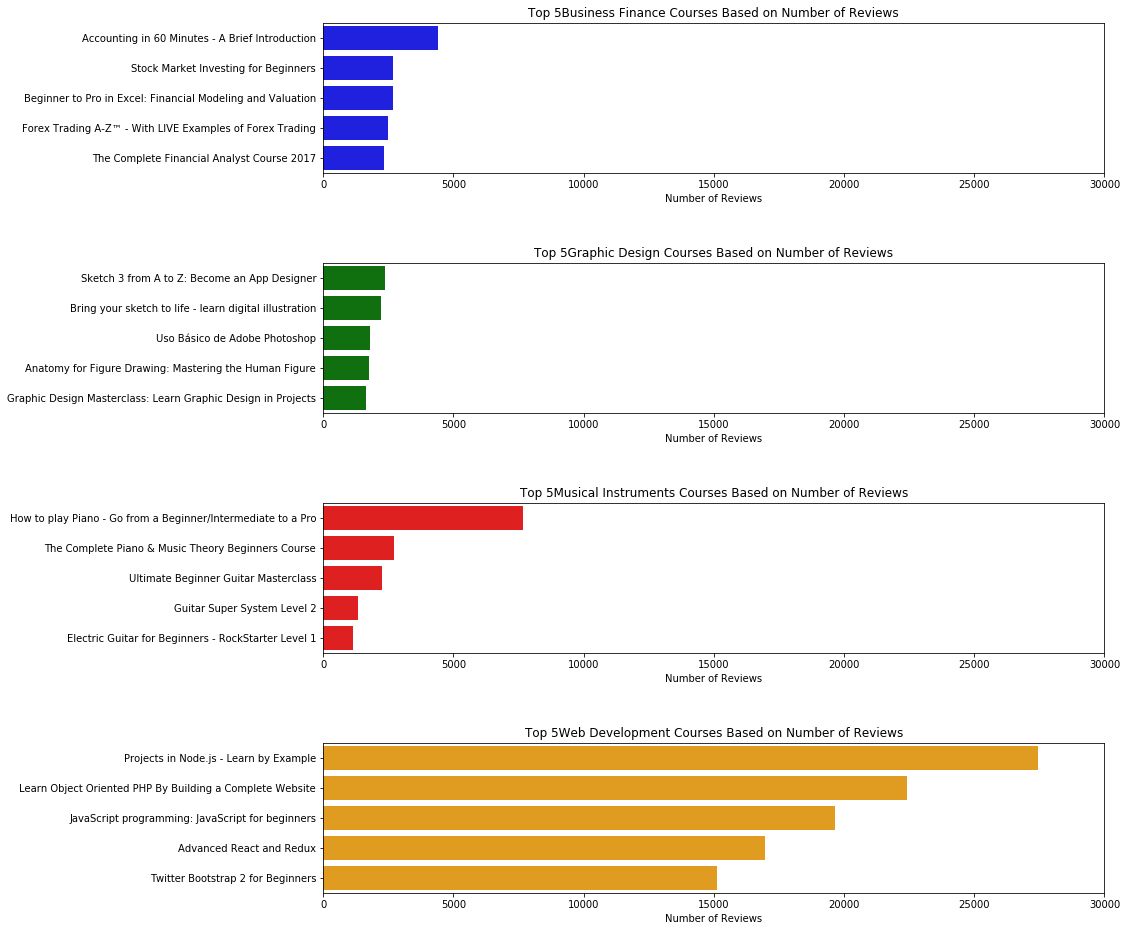

In [35]:
top_5_by_rev = udemy.num_reviews.groupby(udemy.subject).nlargest(5).reset_index(drop=False)
top_5_by_rev['course_title'] = top_5_by_rev.level_1.apply(lambda x: udemy.iloc[x].course_title)
top_5_by_rev.drop('level_1', axis=1, inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(14,16))
plt.subplots_adjust(hspace=0.6)

sns.barplot(data=top_5_by_rev.loc[top_5_by_rev.subject == subject_names[0]], x='num_reviews', y='course_title', ax=axs[0], color='b')
sns.barplot(data=top_5_by_rev.loc[top_5_by_rev.subject == subject_names[1]], x='num_reviews', y='course_title', ax=axs[1], color='g')
sns.barplot(data=top_5_by_rev.loc[top_5_by_rev.subject == subject_names[2]], x='num_reviews', y='course_title', ax=axs[2], color='r')
sns.barplot(data=top_5_by_rev.loc[top_5_by_rev.subject == subject_names[3]], x='num_reviews', y='course_title', ax=axs[3], color='orange')

for i in range(len(axs)):
    axs[i].set(ylabel='', xlabel='Number of Reviews', title='Top 5{} Courses Based on Number of Reviews'.format(subject_names[i]), xlim=(0,30000))

C:\Users\Ram Prasanna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


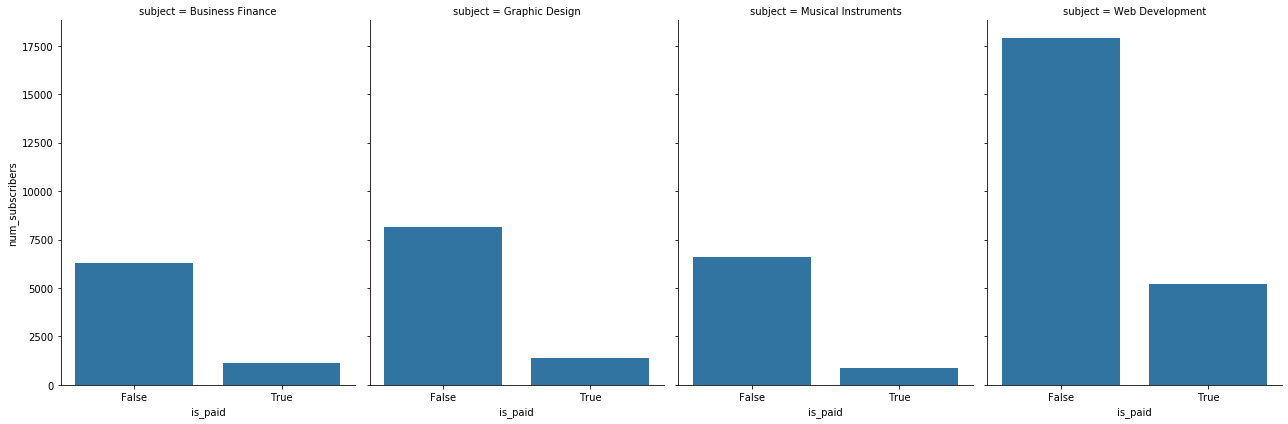

In [36]:
paid_sub = udemy.groupby(['subject', 'is_paid']).agg('mean')['num_subscribers']
paid_sub = pd.DataFrame(paid_sub)
paid_sub.reset_index(drop=False, inplace=True)

g = sns.FacetGrid(paid_sub, col='subject', height=6, aspect=0.75)
g = g.map(sns.barplot, 'is_paid', 'num_subscribers')

The Above Visuals Will give you an Overview of Users Distribution Over Subjects as free and Paid Courses

And Most of the free subscribers and paid subscribers choose Web Development as their Choice

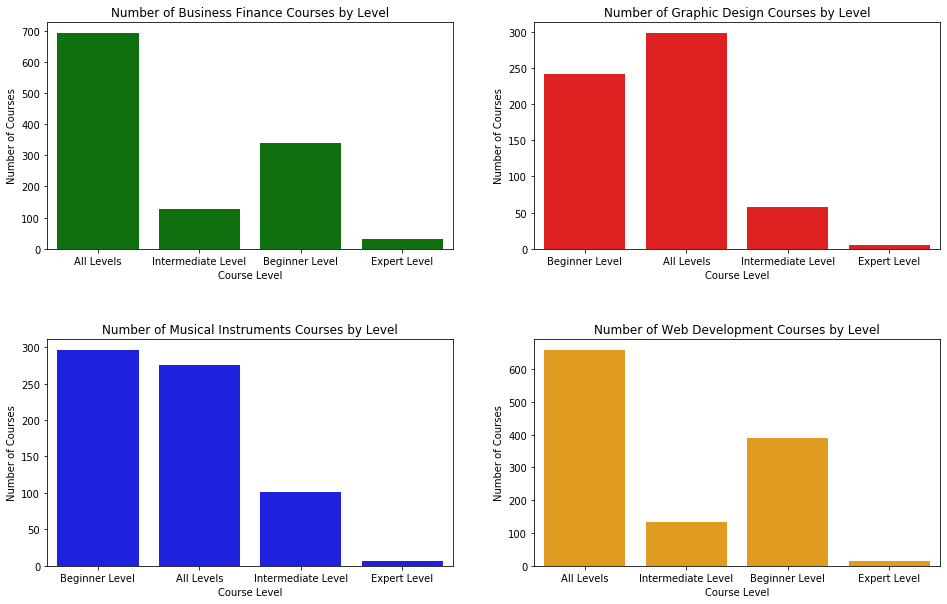

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
plt.subplots_adjust(hspace=0.4)

sns.countplot(udemy.loc[udemy.subject == subject_names[0]].level, ax=axs[0][0], color='g')
sns.countplot(udemy.loc[udemy.subject == subject_names[1]].level, ax=axs[0][1], color='r')
sns.countplot(udemy.loc[udemy.subject == subject_names[2]].level, ax=axs[1][0], color='b')
sns.countplot(udemy.loc[udemy.subject == subject_names[3]].level, ax=axs[1][1], color='orange')

axs[0][0].set(title='Number of {} Courses by Level'.format(subject_names[0]), ylabel='Number of Courses', xlabel='Course Level')
axs[0][1].set(title='Number of {} Courses by Level'.format(subject_names[1]), ylabel='Number of Courses', xlabel='Course Level')
axs[1][0].set(title='Number of {} Courses by Level'.format(subject_names[2]), ylabel='Number of Courses', xlabel='Course Level')
axs[1][1].set(title='Number of {} Courses by Level'.format(subject_names[3]), ylabel='Number of Courses', xlabel='Course Level')
plt.show()

The Above visuals will give you a complete overview of how courses are distributed over levels and subjects

In [38]:
udemy.published_timestamp = pd.to_datetime(udemy.published_timestamp)

In [39]:
udemy['Year'] = udemy.published_timestamp.apply(lambda x: x.year)
udemy['Month'] = udemy.published_timestamp.apply(lambda x: x.month)
udemy['Day'] = udemy.published_timestamp.apply(lambda x: x.dayofweek)

In [40]:
year_group = udemy.groupby('Year').agg('count').course_id
month_group = udemy.groupby('Month').agg('count').course_id
day_of_week_group = udemy.groupby('Day').agg('count').course_id

Number of Courses added by Year:

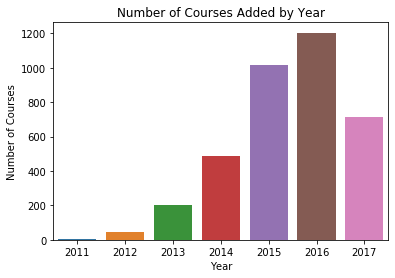

In [41]:
ax = sns.barplot(x=year_group.index, y=year_group.values)
ax.set(title='Number of Courses Added by Year', xlabel='Year', ylabel='Number of Courses')
plt.show()

From the above visuals,it should be noted that 2011 only includes July - December, while 2017 only includes January - July. As a result the values for these years may appear lower than normal.

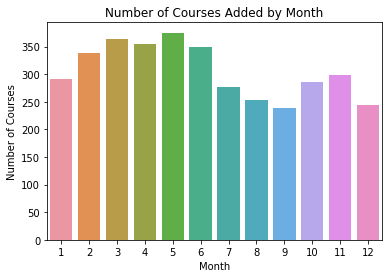

In [42]:
ax = sns.barplot(x=month_group.index, y=month_group.values)
ax.set(title='Number of Courses Added by Month', xlabel='Month', ylabel='Number of Courses')
plt.show()


From the above visuals,we can see the more that more courses are uploaded in the month of May and Less Courses are added in the month of September

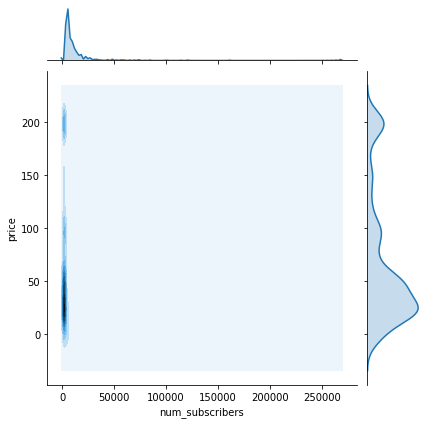

In [43]:
sns.jointplot(x=udemy['num_subscribers'],y=udemy['price'],kind="kde")

There are more courses in the price range of 0-50

## Correlations:

## Correlations within the given Dataset:

In [44]:
udemy.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,Year,revenue,Month,Day
course_id,1.000000,-0.013765,0.143062,-0.166094,-0.058310,-0.024735,-0.057236,0.933027,-0.052398,-0.068845,-0.061181
is_paid,-0.013765,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594,-0.017662,0.072851,0.034848,-0.025077
price,0.143062,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200,0.133654,0.346828,0.038506,-0.037393
num_subscribers,-0.166094,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118,-0.182697,0.555712,0.017085,0.024407
num_reviews,-0.058310,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852,-0.053061,0.770577,0.007039,-0.018656
num_lectures,-0.024735,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624,-0.025243,0.322404,0.031804,-0.007268
content_duration,-0.057236,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000,-0.058824,0.297050,0.020897,-0.011424
Year,0.933027,-0.017662,0.133654,-0.182697,-0.053061,-0.025243,-0.058824,1.000000,-0.057327,-0.289806,-0.065947
revenue,-0.052398,0.072851,0.346828,0.555712,0.770577,0.322404,0.297050,-0.057327,1.000000,0.036431,-0.017366
Month,-0.068845,0.034848,0.038506,0.017085,0.007039,0.031804,0.020897,-0.289806,0.036431,1.000000,-0.001693


Having refrence from the Above table we are going to correlate different columns in our data

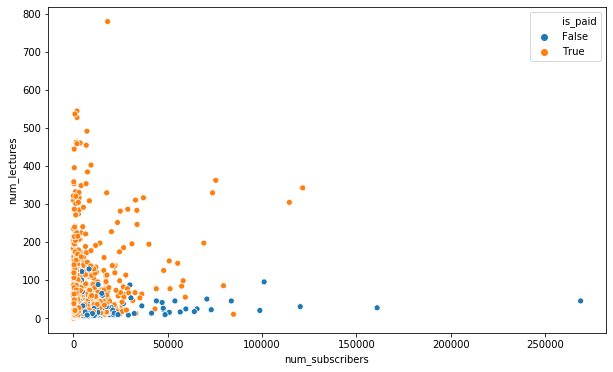

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=udemy['num_subscribers'],y=udemy['num_lectures'],hue=udemy['is_paid'])

The Above Graph shows the correlation between Number of Subscribers with number of Lectures

<Figure size 1152x432 with 0 Axes>

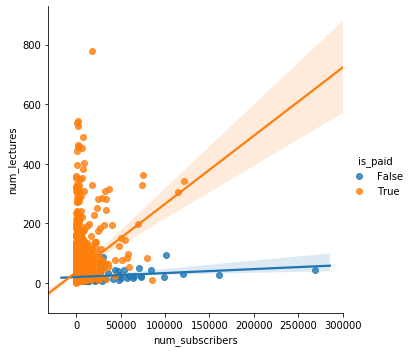

In [46]:
plt.figure(figsize=(16,6))
sns.lmplot(x="num_subscribers",y="num_lectures",hue="is_paid",data=udemy)

The Above Visuals shows that Free Courses have more subscribers and less lecture count whereas the Paid Courses have more courses but less number of subscribers


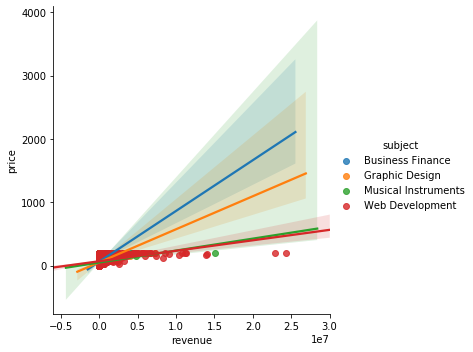

In [47]:
sns.lmplot(x='revenue',y='price',hue='subject',data=udemy)

From the above visuals we can say that eventhough the courses on webdevelopment are less paid they generate more revenue,this means that there are more subscribers for courses on web development and in contrast we can say that the courses in the subject of Business Finance are more paid but still it generates less revenue and this means that there are less subscribers for Business Finance

From the Correlation Table we can say that there is a strong dependency between the number of Subscribers and Number of Reviews

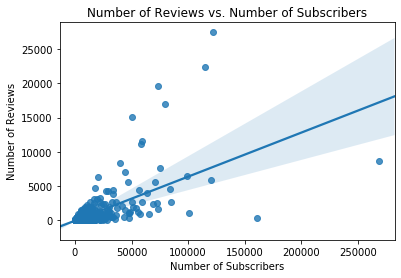

In [48]:
ax = sns.regplot(data=udemy, x='num_subscribers', y='num_reviews')
ax.set(title='Number of Reviews vs. Number of Subscribers', xlabel='Number of Subscribers', ylabel='Number of Reviews')
plt.show()

From the above visuals we can infer that there is a strong dependency between number of subscribers and number of reviews,this can be verified by the above mentioned regression line

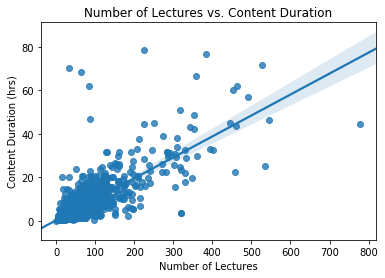

In [49]:
ax = sns.regplot(data=udemy, x='num_lectures', y='content_duration')
ax.set(title='Number of Lectures vs. Content Duration', xlabel='Number of Lectures', ylabel='Content Duration (hrs)')
plt.show()

From the above visuals we can infer that there is a strong dependency between number of lectures and Content Duration as the regression line almost fits all data points

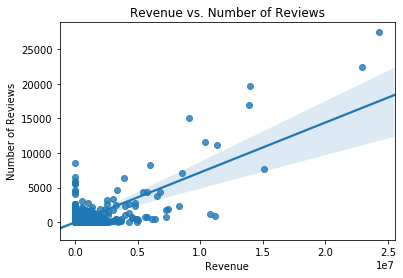

In [50]:
ax = sns.regplot(data=udemy, x='revenue', y='num_reviews')
ax.set(title='Revenue vs. Number of Reviews', xlabel='Revenue', ylabel='Number of Reviews')
plt.show()

From the above visuals we can infer that there is a direct dependency between Number of Reviews and Revenue 

## Correlation with other data sources:

## Number of Internet Users over the Years Vs Number of Courses uploaded over the Years:

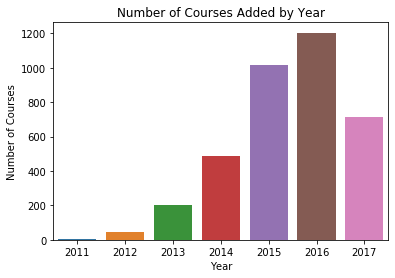

In [51]:
ax = sns.barplot(x=year_group.index, y=year_group.values)
ax.set(title='Number of Courses Added by Year', xlabel='Year', ylabel='Number of Courses')
plt.show()

From the above visuals we infer that,

 * We have to omit 2011 and 2017 in our dataset because in 2011 the courses were added from july to december and in 2017 the courses were added till july
 
 * So considering 2012,2013,2014,2015 and 2016 we see that the trend increases every year this means that number of courses added through each year is increasing.
 
 * From this we can tell that the number of internet users are also increases over the years.
 
 * And the students are tending to show more interest in Online Certification.
 
 * So we like to use the dataset that consists of number of internet users over the years and we are here to prove that the number of internet users over the years is directly proportional to the courses added through each year in udemy dataset

In [52]:
internet = pd.read_excel("C:\\Users\\Ram Prasanna\\Desktop\\corr_data.xlsx",parse_year=True)

In [53]:
internet.dropna(inplace=True)
internet.rename(columns={'Internet Users**':'internet_users'},inplace=True)
internet.Year = internet.Year.astype('int64')
internet.internet_users = internet.internet_users.astype('int64')

In [54]:
final = internet[internet['Year'].isin([2012,2013,2014,2015,2016])]
final = final.sort_values(by='Year')
final

,Year,internet_users
5,2012,2494736248
4,2013,2728428107
3,2014,2956385569
2,2015,3185996155
1,2016,3424971237


In [55]:
udemy = udemy.sort_values(by="Year")
joined = pd.merge(final,udemy,on='Year',how='left')
joined.head()

,Year,internet_users,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,revenue,Month,Day
0,2012,2494736248,15467,Learn To Draw - The COMIC BOOK STYLE,https://www.udemy.com/learn-to-draw/,True,55,363,14,19,All Levels,2.0,2012-06-01 21:53:11+00:00,Graphic Design,19965,6,4
1,2012,2494736248,19422,Drupal 7 for Beginners,https://www.udemy.com/drupal-for-beginners/,True,35,926,102,37,All Levels,2.5,2012-06-14 18:15:00+00:00,Web Development,32410,6,3
2,2012,2494736248,26648,Play Guitar and Understand Music Quick & Easy ...,https://www.udemy.com/how-to-play-guitar-reall...,True,20,738,6,64,All Levels,9.5,2012-10-13 23:40:19+00:00,Musical Instruments,14760,10,5
3,2012,2494736248,20461,How to Design a Logo - a Beginners Course,https://www.udemy.com/how-to-design-a-logo-a-b...,True,30,10875,650,41,All Levels,2.5,2012-07-25 13:41:42+00:00,Graphic Design,326250,7,2
4,2012,2494736248,22825,Beginner Guitar Method,https://www.udemy.com/beginner-guitar/,True,200,85,2,23,Beginner Level,4.0,2012-10-31 04:13:51+00:00,Musical Instruments,17000,10,2


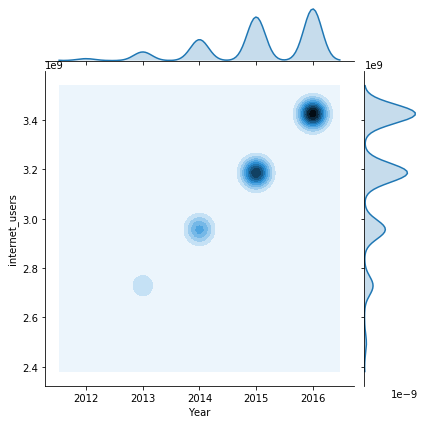

In [56]:
sns.jointplot(x=joined['Year'], y=joined['internet_users'], kind="kde")

From the Above Visuals we can infer that the internet users are increases over the years

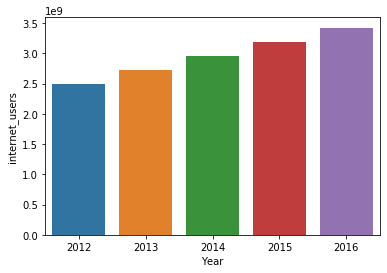

In [57]:
sns.barplot(x='Year',y='internet_users',data=joined)

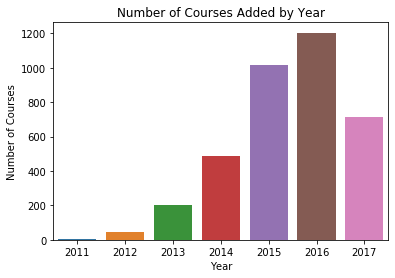

In [58]:
ax = sns.barplot(x=year_group.index, y=year_group.values)
ax.set(title='Number of Courses Added by Year', xlabel='Year', ylabel='Number of Courses')
plt.show()

From the Above two Visuals we can infer that the Number of Courses added by Each year has direct dependency with internet users over the years
* As we compare in both graphs from 2012-2016 both are in the increasing trends

The Following Dataset Consists information about the count of Internet Users across countries,
*So if Udemy targets the Top 10 Countries with Internet Users by providing Content in their Native Languages and providing subscripts in their language 
* By doing this they can surely attract more subscribers

In [59]:
users = pd.read_csv("C:\\Users\\Ram Prasanna\\Desktop\\InternetUsersDataset.csv",index_col='Country Name')

In [60]:
users.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.900000,52.00,58.00,62.0,69.0,74.000000,78.9,83.78,88.661227,NaN
Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,NaN
Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.00,8.260000,NaN
Angola,AGO,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,10.20,12.400000,NaN
Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,NaN


In [61]:

users=users[[
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']]

In [62]:
users

,2011,2012,2013,2014,2015
Country Name,,,,,
Aruba,69.000,74.000000,78.9,83.78,88.661227
Andorra,81.000,86.434425,94.0,95.90,96.910000
Afghanistan,5.000,5.454545,5.9,7.00,8.260000
Angola,3.100,6.500000,8.9,10.20,12.400000
Albania,49.000,54.655959,57.2,60.10,63.252933
...,...,...,...,...,...
"Yemen, Rep.",14.905,17.446500,20.0,22.55,25.099514
South Africa,33.970,41.000000,46.5,49.00,51.919116
"Congo, Dem. Rep.",1.200,1.679961,2.2,3.00,3.800000


In [63]:
users=users.fillna(0)

In [64]:
users1=users.transpose()

In [65]:
users1.head()

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
2011,69.000000,81.000000,5.000000,3.1,49.000000,26.549988,78.000000,51.000000,32.000000,0.0,...,35.07,9.200000,41.080000,31.729753,11.00000,14.905000,33.970000,1.200000,11.5000,8.40
2012,74.000000,86.434425,5.454545,6.5,54.655959,29.954302,84.999992,55.800000,37.500000,0.0,...,39.49,10.598000,43.400000,34.945925,12.92249,17.446500,41.000000,1.679961,13.4682,12.00
2013,78.900000,94.000000,5.900000,8.9,57.200000,32.349896,88.000000,59.900000,41.900000,0.0,...,43.90,11.300000,46.600000,37.416861,15.30000,20.000000,46.500000,2.200000,15.4000,15.50
2014,83.780000,95.900000,7.000000,10.2,60.100000,36.007130,90.400000,64.700000,54.622806,0.0,...,48.31,18.800000,53.670000,40.649950,21.20000,22.550000,49.000000,3.000000,19.0000,16.30
2015,88.661227,96.910000,8.260000,12.4,63.252933,39.526154,91.243406,69.400921,58.249332,0.0,...,52.72,22.351405,57.424192,43.998315,25.40701,25.099514,51.919116,3.800000,21.0000,16.36


In [66]:
users1.describe()

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,78.868245,90.848885,6.322909,8.220000,56.841778,32.877494,86.528679,60.160184,44.854428,0.0,...,43.898000,14.449881,48.434838,37.748161,17.165900,20.000203,44.477823,2.375992,16.073640,13.712000
std,7.763873,6.867831,1.312799,3.571694,5.434117,5.070997,5.349201,7.228226,11.212685,0.0,...,6.975985,5.780951,6.910595,4.787179,5.993669,4.030724,7.113749,1.038698,3.904897,3.466081
min,69.000000,81.000000,5.000000,3.100000,49.000000,26.549988,78.000000,51.000000,32.000000,0.0,...,35.070000,9.200000,41.080000,31.729753,11.000000,14.905000,33.970000,1.200000,11.500000,8.400000
25%,74.000000,86.434425,5.454545,6.500000,54.655959,29.954302,84.999992,55.800000,37.500000,0.0,...,39.490000,10.598000,43.400000,34.945925,12.922490,17.446500,41.000000,1.679961,13.468200,12.000000
50%,78.900000,94.000000,5.900000,8.900000,57.200000,32.349896,88.000000,59.900000,41.900000,0.0,...,43.900000,11.300000,46.600000,37.416861,15.300000,20.000000,46.500000,2.200000,15.400000,15.500000
75%,83.780000,95.900000,7.000000,10.200000,60.100000,36.007130,90.400000,64.700000,54.622806,0.0,...,48.310000,18.800000,53.670000,40.649950,21.200000,22.550000,49.000000,3.000000,19.000000,16.300000
max,88.661227,96.910000,8.260000,12.400000,63.252933,39.526154,91.243406,69.400921,58.249332,0.0,...,52.720000,22.351405,57.424192,43.998315,25.407010,25.099514,51.919116,3.800000,21.000000,16.360000


In [67]:
users.idxmax(axis=0)

2011    Iceland
2012    Iceland
2013    Iceland
2014    Iceland
2015    Bermuda
dtype: object

In [68]:
list1 =users1.mean().sort_values().index
list1

Index(['Korea, Dem. People’s Rep.', 'Northern Mariana Islands',
       'Turks and Caicos Islands', 'Curacao', 'Isle of Man', 'Not classified',
       'Channel Islands', 'Sint Maarten (Dutch part)', 'Palau',
       'American Samoa',
       ...
       'Andorra', 'Finland', 'Liechtenstein', 'Sweden', 'Netherlands',
       'Luxembourg', 'Denmark', 'Bermuda', 'Norway', 'Iceland'],
      dtype='object', name='Country Name', length=264)

In [69]:
users2=users1.reindex(users1.mean().sort_values().index, axis=1)
users3=users2.iloc[:,-10:]
users3

Country Name,Andorra,Finland,Liechtenstein,Sweden,Netherlands,Luxembourg,Denmark,Bermuda,Norway,Iceland
2011,81.000000,88.709995,85.000000,92.769986,91.419996,90.029859,89.810013,88.336000,93.489983,94.819687
2012,86.434425,89.879998,89.407700,93.179988,92.859992,91.949924,92.260012,91.299305,94.649978,96.209800
2013,94.000000,91.514400,93.800000,94.783600,93.956400,93.776500,94.629700,95.300000,95.053400,96.546800
2014,95.900000,92.380000,95.210000,92.520000,93.170000,94.670000,95.990000,96.800000,96.300000,98.160000
2015,96.910000,92.651300,96.641195,90.610200,93.096500,97.334100,96.330500,98.323610,96.810300,98.200000


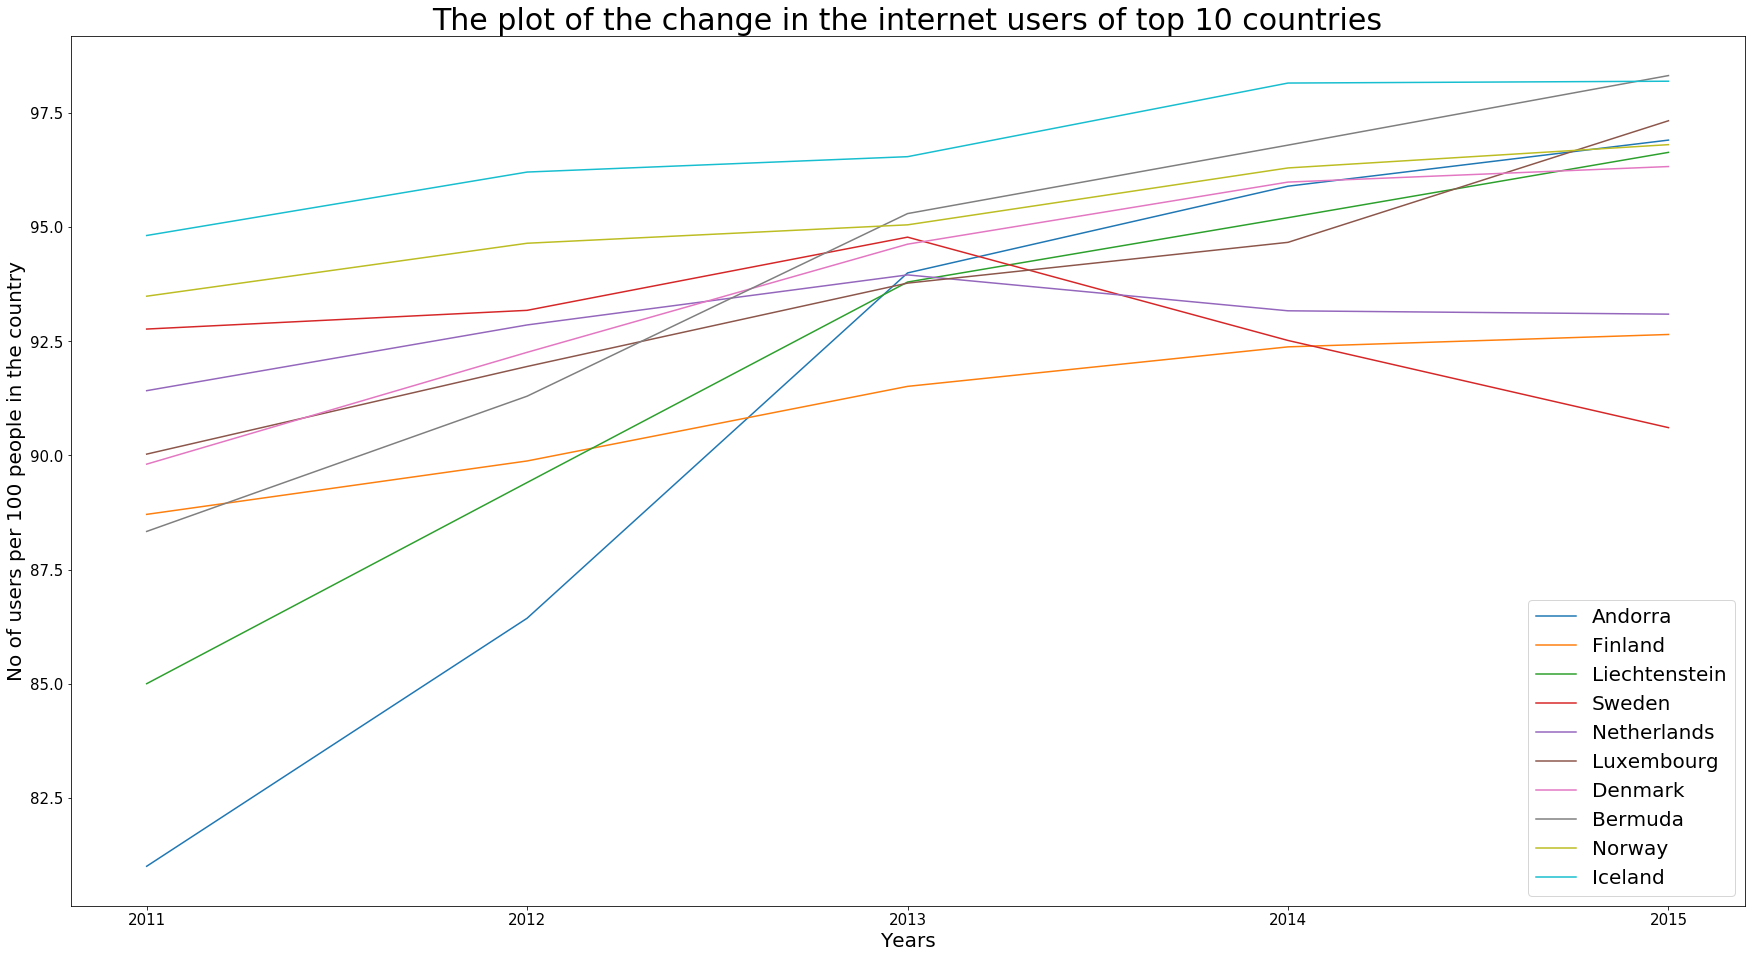

In [70]:
plt.figure(figsize=(30,16))
for i in users3.columns:
    sns.lineplot(data=users3[i],label=i)
plt.title("The plot of the change in the internet users of top 10 countries",fontsize=30)
plt.ylabel("No of users per 100 people in the country",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.legend( prop={'size': 20})
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

The Above Visuals will tell you the Top 10 Countries with more number of Internet Users

So From the Above Visuals we can suggest Udemy,
* These are the Country's with more number of Internet Users
* From the previous visuals we have proved that the number of Subscribers is directly proportional to Number of Internet Users
* So if Udemy also target these 10 Countries by providing content in their native languages and also provide subscripts in their languages
* From the Above Analysis we can sure that if Udemy target those audience then there will be more number of Subscribers